# Project 3a: Waves in Magnetized Plasmas

In this project, we are going to look at the dispersion relation for electromagnetic waves in a uniform magnetic field.

In this project, you will study the accuracy of the dispersion relation we derived in class for waves that propagate across a constant magnetic field. 

In class we began by stating that we are interested in waves with frequencies at or near the plasma frequency so that we can assume the ion motion is not important. We let the magnetic field point in the $\hat z$  direction, $\vec B_0=\hat z B_0$. We than assumed the wave moved in the $\hat x$ direction, $\vec k=\hat x k$. Under these conditions we found that there are two types of waves:

The O-wave (ordinary wave) in which the electric field of the wave points in the $\hat z$ direction, $\vec E=\hat z E$. For this wave the dispersion relation is:

\begin{equation}
\frac {c^2k^2}{\omega^2}=1-\frac{\omega_p^2}{\omega^2}
\end{equation}
and the X-wave (extraordinary wave) in which the electric field of the wave points in both the $\hat y$ and $\hat x$ directions $\vec E=\hat x E_x + \hat y E_y$. For this wave the dispersion relation is:

\begin{equation}
\frac {c^2k^2}{\omega^2}=1-\frac{\omega_p^2}{\omega^2} \frac{\omega^2-\omega_p^2}{\omega^2-\omega_h^2}
\end{equation}

For this wave, the ratio of $E_y$ to $E_x$ is:

\begin{equation}
\frac{E_y}{E_x}=i \frac{\omega}{\omega_c} \frac{\omega^2-\omega_h^2}{\omega_p^2}.  
\end{equation}

In addition,  for the X-wave there are several important frequencies. These are the cutoff frequencies where k vanishes and the wave is reflected:

\begin{equation}
\omega_R=\frac{1}{2}[\omega_c+(\omega_c^2+4\omega_p^2)^{1/2}]
\end{equation}

\begin{equation}
\omega_L=\frac{1}{2}[-\omega_c+(\omega_c^2+4\omega_p^2)^{1/2}]
\end{equation}

and the resonances where k goes to infinity and the wave is absorbed:

\begin{equation}
\omega_h=(\omega_c^2+\omega_p^2)^{1/2}
\end{equation}


At a resonance the wave becomes longitudinal where $\vec E$ is parallel to $\vec k$, the wave only has an $E_x$.


In this project you will study the spectrum of waves that exist in a magnetized plasma. The constant magnetic field will point in the $\hat x_3$ direction $\hat z$. You will simulate a uniform plasma in which each plasma electron is initialized with positions (only in x or what we call x1). Each electron is also initialized with velocities (v1, v2, v3)=(.005c, .005c, .005c) or momentum (mv1, mv2, mv3) from a Maxwellian in each direction. The particles then begin to move in the self-consistent fields that their current and charge density produce:



*	The length of the simulation window is $50 \ c/\omega_p$.
*	The simulation will run for a time $400 \ \ [1/\omega_p] $. 
*	The simulation uses 50,000 particles.


We will have $\frac{\omega_c}{\omega_p}$= 2.




# Dispersion Relation:

## X-wave dispersion

Here you can look at the dispersion relation of the X-wave and the frequencies described above.  Just enter $\omega_c$ and $\omega_{p}$ and re-run the cell below:

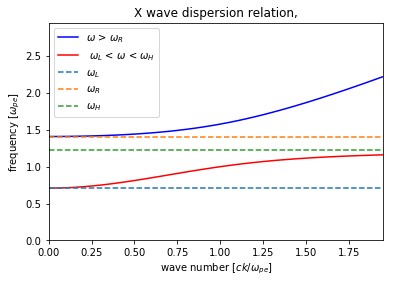

In [2]:
from scipy.optimize import fsolve 
import numpy as np
import matplotlib.pyplot as plt

#first we define the range of k's of interest, "k" here means "ck"

karray=np.arange(0,2,0.05)
nk=karray.shape[0]


# here we specify the plasma conditions 
#

wp=1
wc=0.7

#
#


def xwave_disp(w,omegap,omegac,ck):
    ratio=omegac/omegap
    y=(ck*ck)/(omegap*omegap)-(w*w)/(omegap*omegap)+(w*w/(omegap*omegap)-1)/(w*w/(omegap*omegap)-(1+ratio*ratio))
    return y


wR=0.5*(wc+np.sqrt(4*wp*wp+wc*wc))
wL=0.5*(np.sqrt(4*wp*wp+wc*wc)-wc)

warrayL=np.zeros(karray.shape[0])
warrayR=np.zeros(karray.shape[0])
wLarray=np.zeros(karray.shape[0])
wRarray=np.zeros(karray.shape[0])
wHarray=np.zeros(karray.shape[0])

wLarray[:]=wL
wRarray[:]=wR
wHarray[:]=np.sqrt(wp*wp+wc*wc)

warrayL[0]=wL
warrayR[0]=wR
for ik in range(1,nk):
    warrayL[ik]=fsolve(xwave_disp,warrayL[ik-1],args=(wp,wc,karray[ik]))
    warrayR[ik]=fsolve(xwave_disp,warrayR[ik-1],args=(wp,wc,karray[ik]))

plt.plot(karray,warrayR,'b',label='$\omega$ > $\omega_R$')
plt.plot(karray,warrayL,'r',label=' $\omega_L$ < $\omega$ < $\omega_H$')
plt.plot(karray,wLarray,'--',label='$\omega_L$')
plt.plot(karray,wRarray,'--',label='$\omega_R$')
plt.plot(karray,wHarray,'--',label='$\omega_H$')
plt.xlabel('wave number $[ck/\omega_{pe}]$')
plt.ylabel('frequency $[\omega_{pe}]$')
plt.title('X wave dispersion relation,')
plt.legend()
plt.xlim([0,karray[nk-1]])
plt.ylim([0,karray[nk-1]+1.0])
#plt.grid(b=True, which='major', axis='both')
plt.legend(loc=0)
plt.show()

## O-wave dispersion

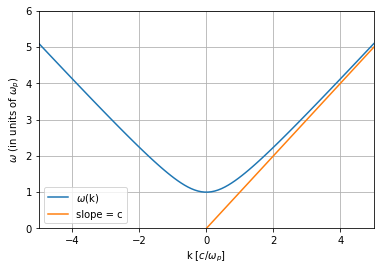

In [2]:
# Plotting w(k)
import numpy as np
import matplotlib.pyplot as plt
N = 5
k = np.linspace(-N,N,N*20)
w_p = 1
c = 1
w = np.sqrt(w_p**2 + c**2 * k**2)
cline = k
plt.plot(k,w, label='$\omega$(k)')
plt.plot(k,cline, label='slope = c')
plt.xlabel('k [$c/\omega_p$]')
plt.ylabel('$\omega$ (in units of $\omega_p$)')
plt.xlim(-N,N)
plt.ylim(0,N+1)
plt.grid(b=True, which='major', axis='both')
plt.legend(loc=0)
plt.show()

# Simulations with a Particle-in-Cell Code

In this project you simulate plasmas with similar conditions as in Project 1a and 2a.

Each plasma electron is initialized with positions (only in $x$ or what we call $x_1$) such that the density is uniform. The ions are initialized at the same positions but they have an infinite mass.  Each electron is also initialized with velocities ($v_1$, $v_2$, $v_3$) or momentum ($mv_1$, $mv_2$, $mv_3$) from a Maxwellian in each direction. The particles then begin to move in the self-consistent fields that their current and charge density produce.

* The length of the plasmas is 50 $c/\omega_p$
* The simulation will run for a time 400 $1/\omega_p$.
* The simulation uses 50,000 particles.

You will be looking at plots of the electric field in the $x_3$ direction, $E_3$, which corresponds to O-waves, and at electric fields in the $x_1$ and $x_2$ directions, $E_1$ and $E_2$, which corresponds to X-waves.

### The following lines must always be executed before running anything else.

Reminder: Hit Shift+Enter to run a cell, or select the cell and click on the "Run" button in the top menu bar

In [5]:
import osiris
%matplotlib inline

## Run cases in which $\Omega_{ce} = 0.5 \omega_{pe}$ and $2.0 \omega_{pe}$.

In [6]:
# vth/c = 0.005
dirname = 'therm-b05'
osiris.runosiris(rundir=dirname,inputfile='therm-b05.txt')

runosiris completed normally


In [7]:
# vth/c = 0.005
dirname = 'therm-b20'
osiris.runosiris(rundir=dirname,inputfile='therm-b20.txt')

runosiris completed normally


## Case for which $\Omega_{ce} = 0.5 \omega_{pe}$.

After the simulation is finished, plot $E_3(x_1)$ at $t \approx 100$ (run the next cell). 
* Do you see any evidence of a coherent wave?
* Does the plot make sense?

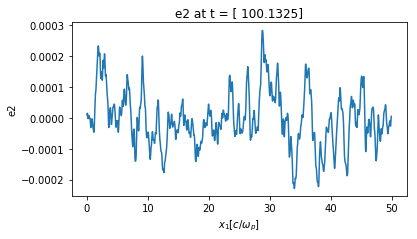

In [8]:
dirname = 'therm-b05'
osiris.field(rundir=dirname, dataset='e2', time=100)

Next, plot $E_3(t)$ at $x_1=5 c/\omega_p$ (i.e., at cell=100). 
* Do you see any evidence of a coherent wave? 
* Does the plot make sense?

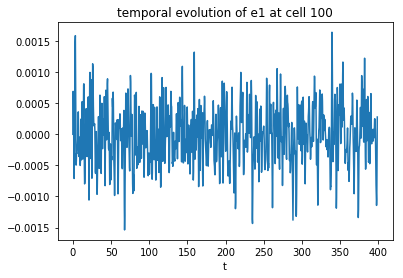

In [9]:
dirname = 'therm-b05'
osiris.field(rundir=dirname, dataset='e2', space=100)

Next, in the following two cells, we are going to plot $\omega(k)$.  This is generated by taking $E_3(x_1,t)$ and Fourier analyzing in both position and time.

-------
* $\omega(k)$ with wavenumber in units of [k] = $\omega_{pe}/c$: 

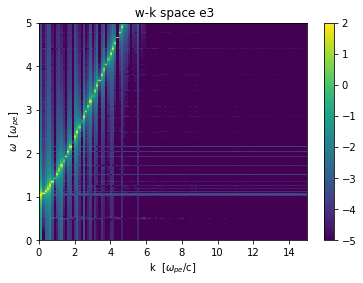

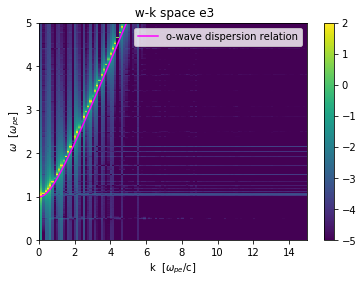

In [9]:
# omode
dirname = 'therm-b05'
osiris.plot_wk(rundir=dirname, wlim=[0,5], klim=[0,15], vth = 0.1, b0_mag=0.5, vmin=-5, vmax=2, plot_or=3) 
osiris.plot_wk(rundir=dirname, wlim=[0,5], klim=[0,15], vth = 0.1, b0_mag=0.5, vmin=-5, vmax=2, plot_or=3, 
               show_theory=True) 

* Do these plots make sense?

-------
* $\omega(k)$ with wavenumber in units of [k] = $\lambda_{De}$: 

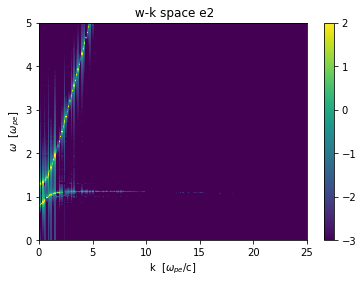

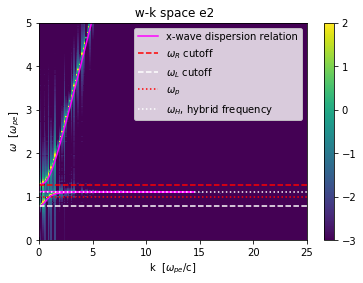

In [11]:
#import roman
#import osiris
#%matplotlib inline
# xmode
dirname = 'therm-b05'
osiris.plot_wk(rundir=dirname, wlim=[0,5], klim=[0,25], vmin=-3, vmax=2, vth = 0.02, b0_mag=0.5, plot_or=2) 
osiris.plot_wk(rundir=dirname, wlim=[0,5], klim=[0,25], vmin=-3, vmax=2, vth = 0.02, b0_mag=0.5, plot_or=2, 
               show_theory=True) 

* What are the range of frequencies where the x-wave exists?
* Why do you think you do not see any signal in $E_2$ for $\frac{kc}{\omega_p}$ > 10 for the waves near $\omega_H$?
* What is the order of $\omega_R$, $\omega_L$, $\omega_H$, and $\omega_p$? (highest to lowest)

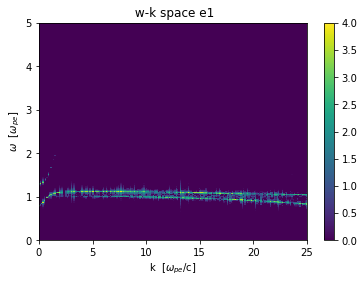

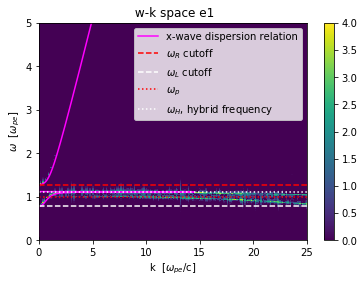

In [12]:
# xmode
dirname = 'therm-b05'
osiris.plot_wk(rundir=dirname, wlim=[0,5], klim=[0,25], vmin=0, vmax=4, vth=0.02, b0_mag=0.5, plot_or=1) 
osiris.plot_wk(rundir=dirname, wlim=[0,5], klim=[0,25], vmin=0, vmax=4, vth=0.02, b0_mag=0.5, plot_or=1, 
               show_theory=True) 

* Why don't you see much signal in $E_1$ for the frequencies above $\omega_R$
* Do you have any guesses as to what the extra curve is due to?
* Why didn't the $\omega (k)$ plots for $E_3$ change when $B_3$ was increased?

## Case for which $\Omega_{ce} = 2.0 \omega_{pe}$.

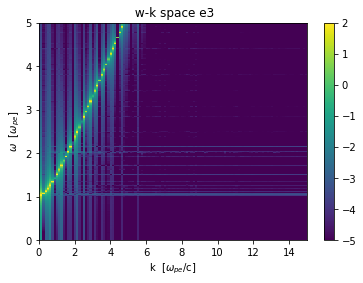

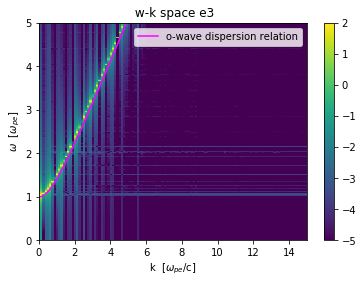

In [13]:
dirname = 'therm-b20'
osiris.plot_wk(rundir=dirname, wlim=[0,5], klim=[0,15], vmin=-5, vmax=2, vth = 0.1, b0_mag=2.0, plot_or=3) 
osiris.plot_wk(rundir=dirname, wlim=[0,5], klim=[0,15], vmin=-5, vmax=2, vth = 0.1, b0_mag=2.0, plot_or=3, 
               show_theory=True) 

* When $B_3$ was increased did the order of $\omega_R$, $\omega_L$, $\omega_H$, and $\omega_p$ change?

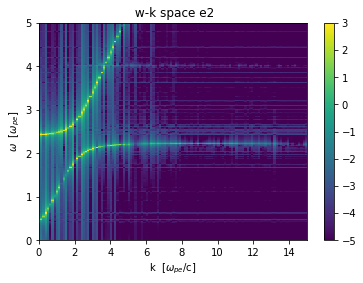

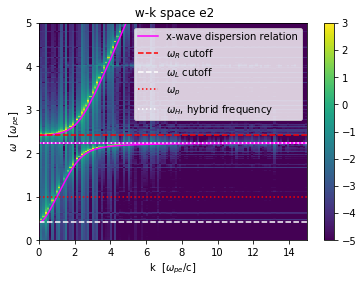

In [14]:
dirname = 'therm-b20'
osiris.plot_wk(rundir=dirname, wlim=[0,5], klim=[0,15], vmin=-5, vmax=3, vth=0.02, b0_mag=2.0, plot_or=2) 
osiris.plot_wk(rundir=dirname, wlim=[0,5], klim=[0,15], vmin=-5, vmax=3, vth=0.02, b0_mag=2.0, plot_or=2, 
               show_theory=True) 

* Why is the signal weaker for the modes with $\omega$<$\omega_H$ for $\frac{kc}{\omega_p}$<2?

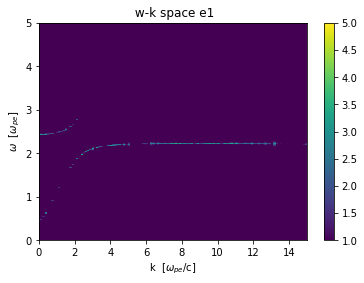

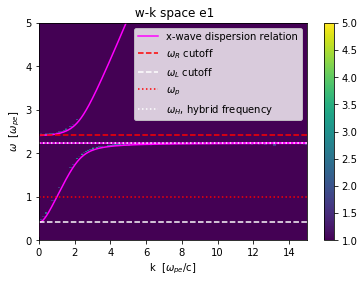

In [15]:
dirname = 'therm-b20'
osiris.plot_wk(rundir=dirname, wlim=[0,5], klim=[0,15], vmin=1, vmax=5, vth = 0.1, b0_mag=2.0, plot_or=1) 
osiris.plot_wk(rundir=dirname, wlim=[0,5], klim=[0,15], vmin=1, vmax=5, vth = 0.1, b0_mag=2.0, plot_or=1, 
               show_theory=True) 